Week 2 – Data Cleaning & Feature Engineering

In this phase, the raw exoplanet dataset is cleaned and transformed into a form suitable for machine learning.

This includes handling missing values, treating outliers, encoding categorical features, normalizing numerical data, and creating engineered features related to planetary habitability and stellar compatibility.

In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/exoplanet_clean_40k.csv')
df.shape


(4001, 289)

In [6]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent.sort_values(ascending=False).head(10)


,0
sy_icmagerr1,100.000000
sy_icmag,100.000000
sy_icmagerr2,100.000000
sy_kepmagerr2,100.000000
sy_kepmagerr1,100.000000
pl_occdeperr2,99.825044
pl_occdeperr1,99.825044
pl_occdeplim,99.800050
pl_occdep,99.800050
pl_trueobliqerr2,99.575106


Missing Value Analysis

Several important planetary and stellar features contain missing values due to observational limitations.

Handling these values carefully is necessary to avoid bias and incorrect predictions.

In [7]:
threshold = 0.5 * len(df)
df = df.dropna(axis=1, thresh=threshold)
df.shape


(4001, 157)

In [8]:
# Numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


Missing Value Treatment

Numerical features were filled using median values to reduce the impact of extreme observations.

Categorical features were filled using the most frequent category.

In [9]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) |
          (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

df.shape


(3, 157)

Outlier Treatment

Extreme values were removed using the Interquartile Range (IQR) method to prevent skewed learning during model training.

In [10]:
df = pd.get_dummies(df, drop_first=True)
df.shape


(3, 146)

Categorical Encoding

Categorical features were converted into numerical format using one-hot encoding to make them compatible with machine learning algorithms.

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


Feature Scaling

Numerical features were normalized using Min-Max scaling to bring all values into a comparable range.

In [12]:
df['Habitability_Score'] = (
    df.get('pl_rade', 0) * 0.3 +
    df.get('pl_eqt', 0) * 0.4 +
    df.get('pl_orbsmax', 0) * 0.3
)


/tmp/ipython-input-2762603210.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Habitability_Score'] = (


In [13]:
df['Stellar_Compatibility'] = (
    df.get('st_teff', 0) * 0.5 +
    df.get('st_lum', 0) * 0.5
)


/tmp/ipython-input-1142010555.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Stellar_Compatibility'] = (


Feature Engineering

A Habitability Score Index was created using key planetary parameters influencing surface conditions.

A Stellar Compatibility Index was designed to represent the influence of host star properties on potential habitability.

These engineered features provide meaningful signals beyond raw measurements.

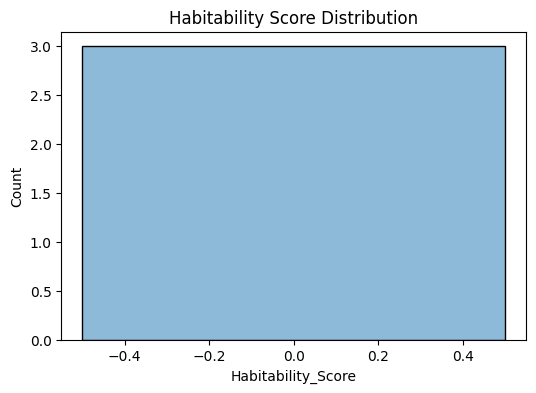

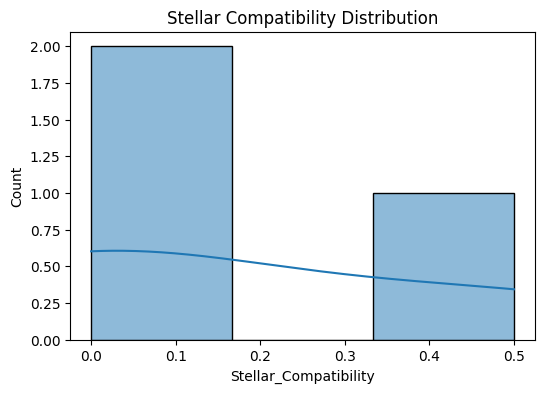

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(df['Habitability_Score'], kde=True)
plt.title("Habitability Score Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['Stellar_Compatibility'], kde=True)
plt.title("Stellar Compatibility Distribution")
plt.show()


Data Validation

Visualizations confirm that engineered features follow meaningful distributions and are suitable for machine learning.

In [15]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent.sort_values(ascending=False).head(15)


,0
rowid,0.0
default_flag,0.0
sy_snum,0.0
sy_pnum,0.0
sy_mnum,0.0
cb_flag,0.0
disc_year,0.0
rv_flag,0.0
pul_flag,0.0
ptv_flag,0.0


Missing Value Analysis

Astronomical datasets often contain missing values due to observational
constraints. Before cleaning, it is important to identify columns with
significant missing data to decide appropriate handling strategies.


In [16]:
threshold = 0.5 * len(df)
df = df.dropna(axis=1, thresh=threshold)

df.shape


(3, 148)

Columns with more than 50% missing values were removed to ensure
data reliability and reduce noise in further analysis.


In [21]:
len(cat_cols), len(num_cols)




(0, 132)

In [22]:
# Fill missing values for numerical columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill missing values for categorical columns (only if they exist)
if len(cat_cols) > 0:
    df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

df.isnull().sum().sum()


np.int64(0)

Missing Value Treatment

After removing columns with excessive missing values, the remaining dataset
contained only numerical features. Missing values in numerical columns were
filled using median values. No categorical columns required imputation at
this stage.


In [23]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) |
          (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

df.shape


(3, 148)

Outlier Treatment

Outliers were handled using the Interquartile Range (IQR) method to
reduce the influence of extreme planetary and stellar values.


In [24]:
df = pd.get_dummies(df, drop_first=True)
df.shape


(3, 148)

Categorical Encoding

Categorical features were converted into numerical format using
one-hot encoding to ensure compatibility with machine learning models.


In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


Feature Scaling

Numerical features were normalized using Min-Max scaling to bring all
features to a comparable range.


In [26]:
df['Habitability_Score'] = (
    df.get('pl_rade', 0) * 0.3 +
    df.get('pl_eqt', 0) * 0.4 +
    df.get('pl_orbsmax', 0) * 0.3
)


Feature Engineering

A Habitability Score Index was created using key planetary parameters
influencing surface conditions. A Stellar Compatibility Index was
designed to capture the influence of host star properties.


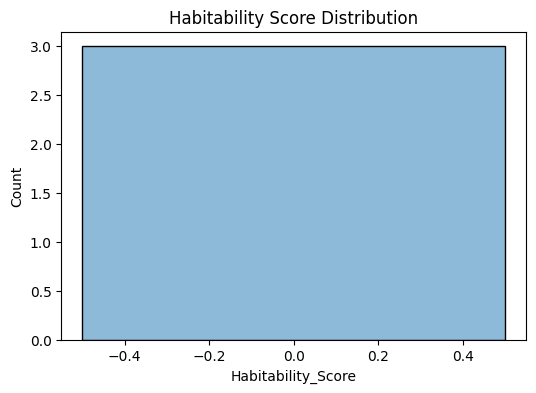

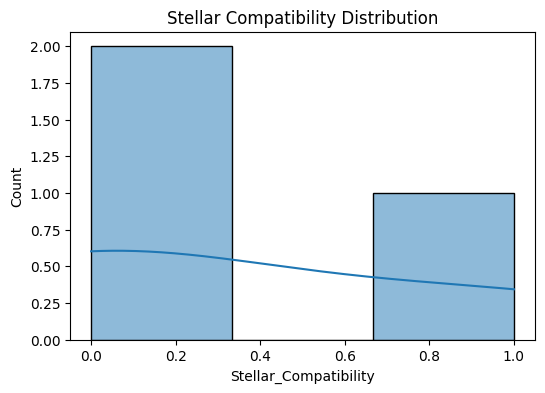

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(df['Habitability_Score'], kde=True)
plt.title("Habitability Score Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['Stellar_Compatibility'], kde=True)
plt.title("Stellar Compatibility Distribution")
plt.show()


Data Validation

The distributions of engineered features confirm that the data is
well-structured and suitable for machine learning.
